# Reinforcement Learning: Q-Learning Maze Navigation

In [1]:
# Step 1: Imports and Maze Definition

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [3]:

maze = np.array([
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 0]
])

start = (0, 0)
goal = (9, 9)


In [4]:
#Step 2: RL Parameters and Q-Table

In [5]:

num_episodes = 5000
alpha = 0.1
gamma = 0.9
epsilon = 0.5

reward_fire = -10
reward_goal = 50
reward_step = -1

actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

Q = np.zeros(maze.shape + (len(actions),))


In [6]:
#Step 3: Helper Functions

In [7]:

def is_valid(pos):
    r, c = pos
    return (
        0 <= r < maze.shape[0] and
        0 <= c < maze.shape[1] and
        maze[r, c] == 0
    )

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    return np.argmax(Q[state])


In [8]:
#Step 4: Q-Learning Training Loop

In [9]:

rewards_all_episodes = []

for episode in range(num_episodes):
    state = start
    total_rewards = 0
    done = False

    while not done:
        action_idx = choose_action(state)
        action = actions[action_idx]
        next_state = (state[0] + action[0], state[1] + action[1])

        if not is_valid(next_state):
            reward = reward_fire
            done = True
        elif next_state == goal:
            reward = reward_goal
            done = True
        else:
            reward = reward_step

        old_value = Q[state][action_idx]
        next_max = np.max(Q[next_state]) if is_valid(next_state) else 0

        Q[state][action_idx] = old_value + alpha * (
            reward + gamma * next_max - old_value
        )

        state = next_state
        total_rewards += reward

    epsilon = max(0.01, epsilon * 0.995)
    rewards_all_episodes.append(total_rewards)


In [10]:
#Step 5: Extract Optimal Path

In [11]:

def get_optimal_path(Q, start, goal, actions, maze, max_steps=200):
    path = [start]
    state = start
    visited = set()

    for _ in range(max_steps):
        if state == goal:
            break

        visited.add(state)
        best_action = None
        best_value = -np.inf

        for i, move in enumerate(actions):
            next_state = (state[0] + move[0], state[1] + move[1])

            if is_valid(next_state) and next_state not in visited:
                if Q[state][i] > best_value:
                    best_value = Q[state][i]
                    best_action = i

        if best_action is None:
            break

        move = actions[best_action]
        state = (state[0] + move[0], state[1] + move[1])
        path.append(state)

    return path

optimal_path = get_optimal_path(Q, start, goal, actions, maze)


In [12]:
#Step 6: Visualization

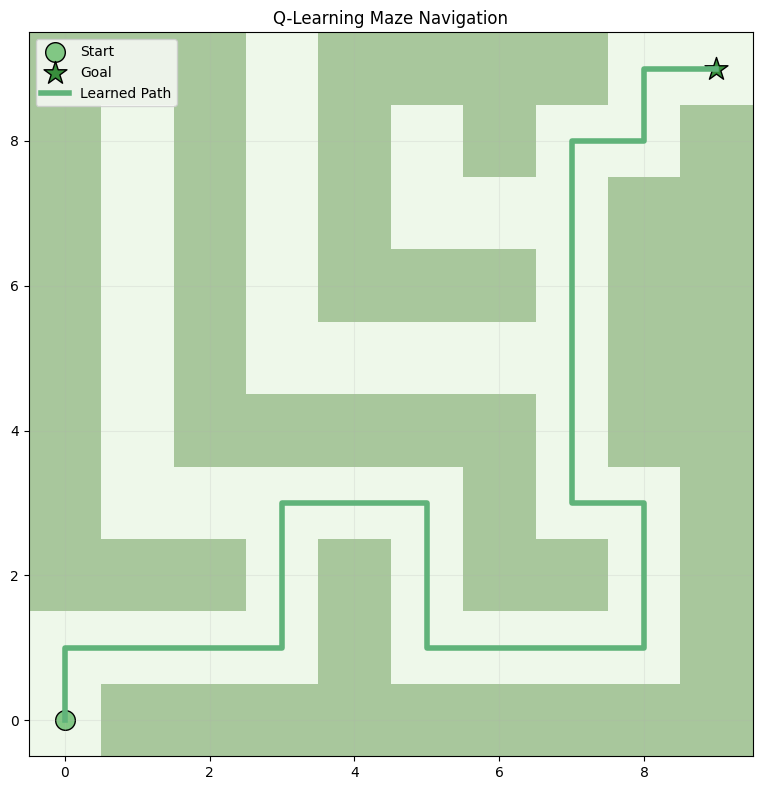

In [13]:

def plot_maze_with_path(path):
    cmap = ListedColormap(['#eef8ea', '#a8c79c'])

    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap=cmap)

    plt.scatter(start[1], start[0], s=200, c='#81c784',
                edgecolors='black', label='Start')
    plt.scatter(goal[1], goal[0], s=300, c='#388e3c',
                marker='*', edgecolors='black', label='Goal')

    rows, cols = zip(*path)
    plt.plot(cols, rows, linewidth=4, c='#60b37a', label='Learned Path')

    plt.gca().invert_yaxis()
    plt.grid(alpha=0.2)
    plt.legend()
    plt.title('Q-Learning Maze Navigation')
    plt.tight_layout()
    plt.show()

plot_maze_with_path(optimal_path)
